<a href="https://colab.research.google.com/github/dkmishra2407/machinelearning-/blob/main/CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

USING THE ABOVE CLUSTERING ALGO WE HAVE TO CLASSIFIY THE CI=USTOMERS CATEGORY FROM WHICH THEY ARE GOING TO BELONGS   

In [15]:
df = pd.read_csv('/Mall_Customers.csv')

In [16]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [17]:
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [18]:
x = df.iloc[:,3:]

In [19]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


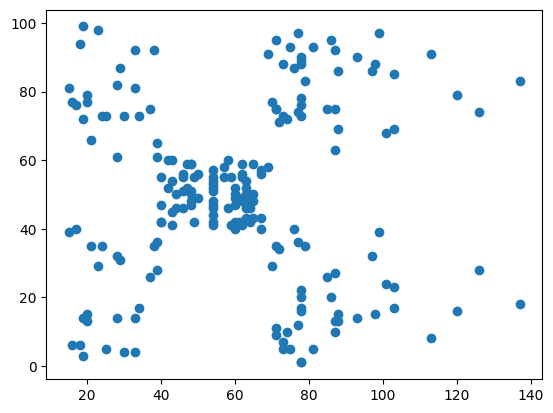

In [20]:
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])

In [21]:
#METHODS TO DETERMINE IDEAL NUMBER OF METHODS
#ELBOW METHOD :- CLUSTERING EVALUATION  (compute t he sum of squared error for some values of k and we get elbow point)
#SILHOUETTE METHOD :-

In [22]:
from sklearn.cluster import KMeans , AgglomerativeClustering

In [23]:
km = KMeans(n_clusters=3)

In [24]:
km.fit_predict(x)
km.inertia_

106348.37306211119

In [26]:
sse = []
for i in range (1,16):
  km = KMeans(n_clusters=i)
  km.fit_predict(x)
  sse.append(km.inertia_)

In [27]:
sse

[269981.28000000014,
 184131.8850278851,
 106348.37306211119,
 73880.64496247198,
 66733.43857149452,
 38831.14638083547,
 32278.293453087783,
 25095.703209997544,
 21932.392044240973,
 21273.824185375342,
 18178.021333355475,
 17149.64012392836,
 16776.103995621237,
 13606.4485323816,
 13451.904865424425]

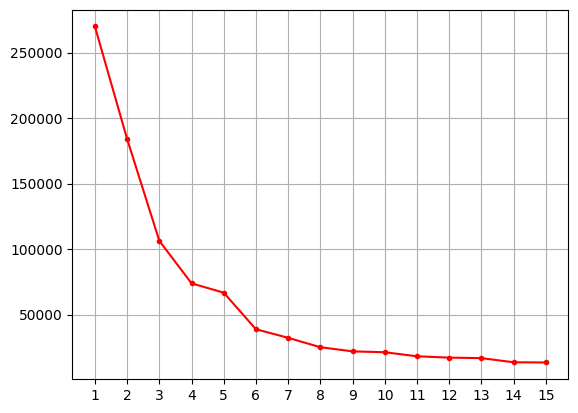

In [28]:
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16),sse,marker='.',color='red')

In [29]:
from sklearn.metrics import silhouette_score

silh = []
for i in range(2,16):
  km = KMeans(n_clusters=i)
  labels = km.fit_predict(x)
  score = silhouette_score(x,labels)
  silh.append(score)

#silhouette value is between +1 to -1
#it is way to measure how close each point in a cluster is to the points in neighbouring cluster

# +1 --> plt.close
# -1 --> far away
# 0 --> boundary

# s[i] = b[i]-a[i]/max{b[i],a[i]}

In [31]:
silh

[0.3866796710262996,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5428234160403222,
 0.45466517582711224,
 0.45632595452408425,
 0.4344132563675038,
 0.4481804392864723,
 0.40830140921210345,
 0.42903470410496636,
 0.4261197447092509,
 0.39978787036732727,
 0.41420873302879785]

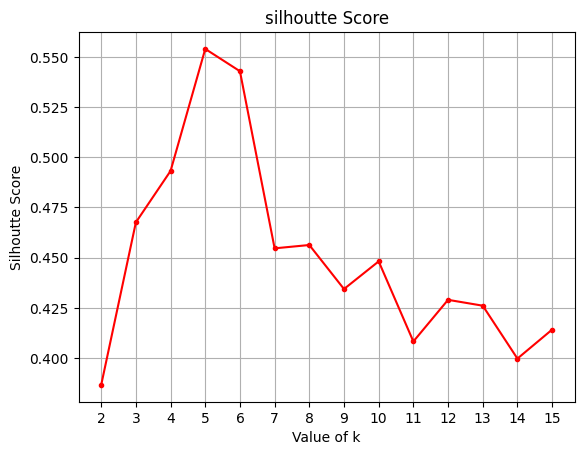

In [35]:
plt.title("silhoutte Score")
plt.xlabel("Value of k")
plt.ylabel("Silhoutte Score")
plt.grid()
plt.xticks(range(2,16))
plt.plot(range(2,16),silh,marker='.',color='red')

In [36]:
km = KMeans(n_clusters=5,random_state=42)

In [37]:
labels = km.fit_predict(x)
labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

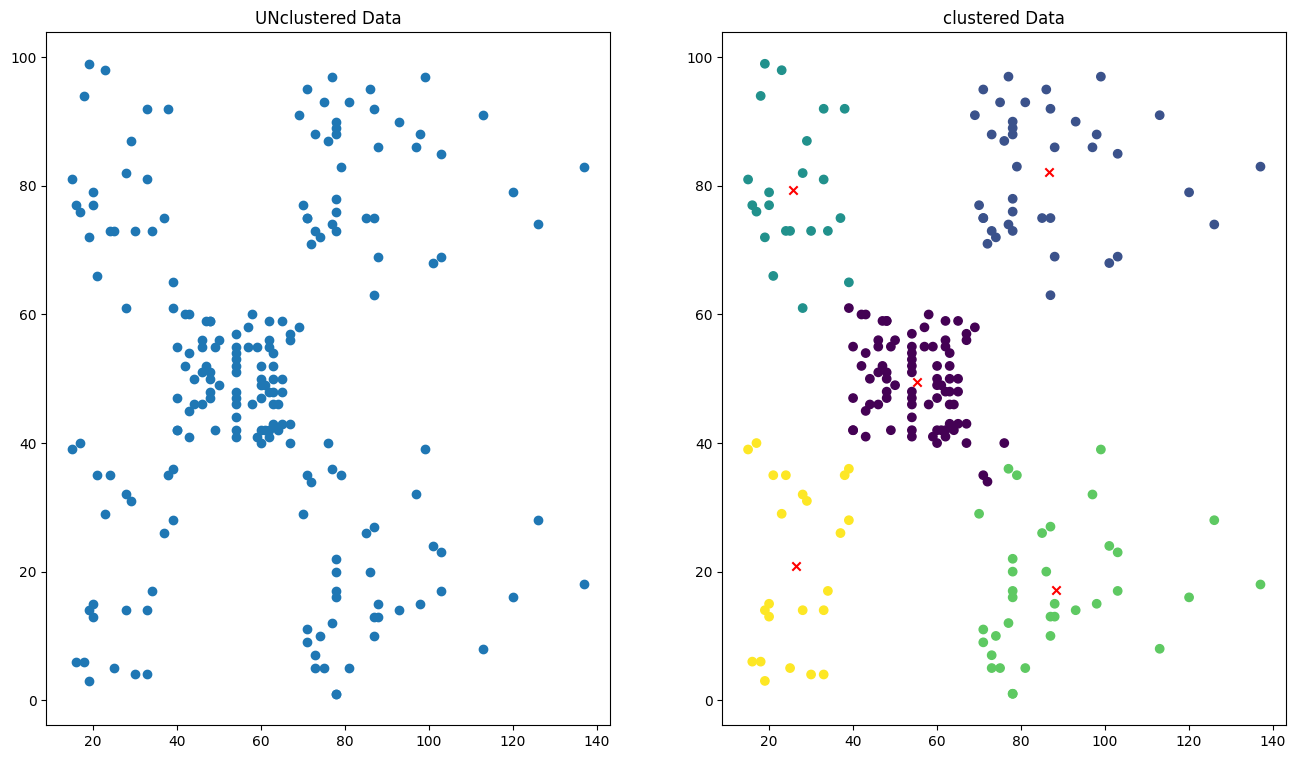

In [42]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title("UNclustered Data")
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])

plt.subplot(1,2,2)
plt.title("clustered Data")
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=labels)

centers = km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker='x',color='red')

In [43]:
FOUR = df[labels==4]

In [44]:
FOUR.to_csv('deva.csv')

In [45]:
km.predict([[15,20]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)

OTHER ALGORITHM IS AGGLOMEERATIVE CLUSTEING


In [46]:
agl = AgglomerativeClustering(n_clusters=5)
alabels = agl.fit_predict(x)

In [47]:
alabels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

DIFFERENCE BETWEEN HIERACHICAL AND KMEANS

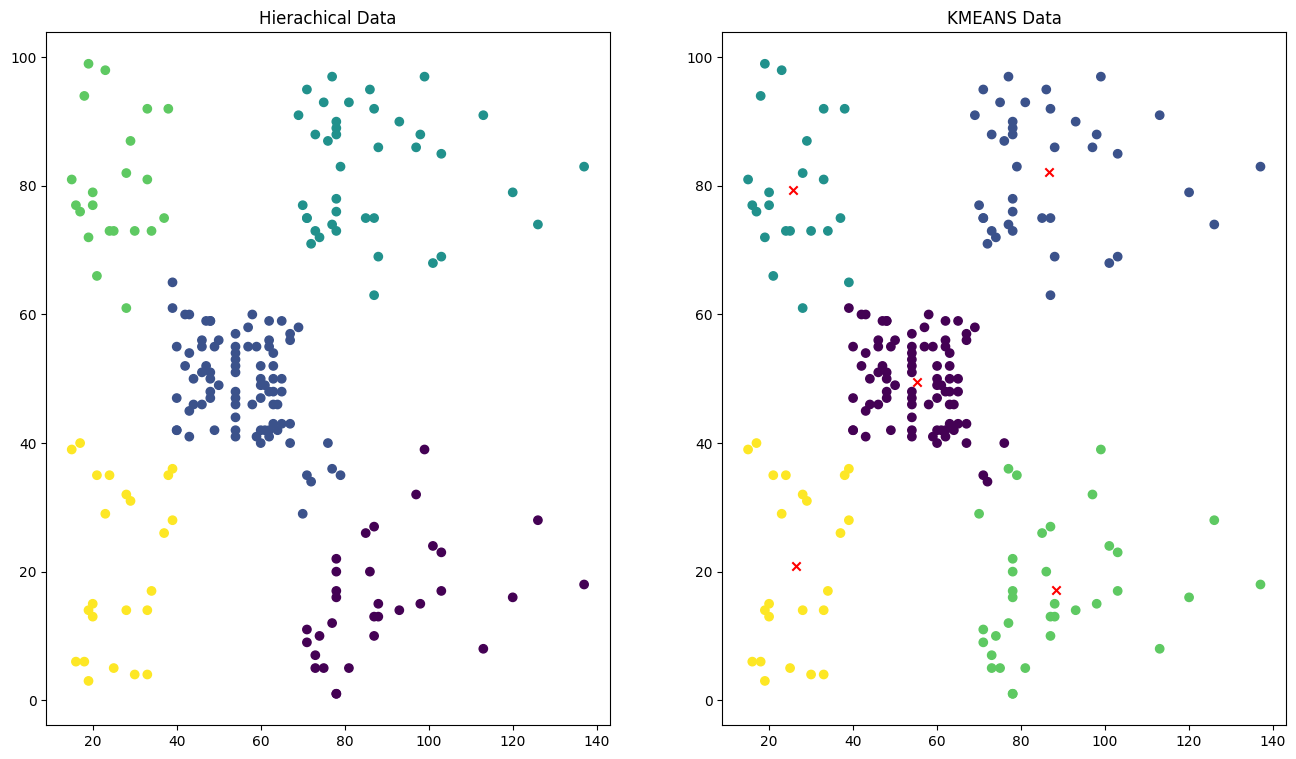

In [49]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title("Hierachical Data")
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=alabels)

plt.subplot(1,2,2)
plt.title("KMEANS Data")
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=labels)

centers = km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker='x',color='red')